## Remove cancer type experiments

In our previous experiments, we were comparing pancancer mutation prediction (train a model on all cancer types, then test on a single cancer type) with single-cancer mutation prediction (train and test on the same single cancer type).

Here, we want to find out what happens to performance when we remove the relevant cancer type from the pancancer training set (i.e. train on all cancer types minus the one we test on). We plan to compare this with the pancancer results, under the assumption that this should be detrimental to performance.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
single_cancer_dir = os.path.join(cfg.results_dir,
                                 'pancancer_only_params',
                                 'single_cancer')
pancancer_dir = os.path.join(cfg.results_dir, 'pancancer')
remove_cancer_dir = os.path.join(cfg.results_dir,
                                 'pancancer_only_params',
                                 'pancancer_only')

In [3]:
single_cancer_df = au.load_prediction_results(single_cancer_dir, 'single_cancer')
print(single_cancer_df.shape)
single_cancer_df.head()

(7200, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,1.00000,1.00000,MAP3K1,BRCA,signal,42,train,0,single_cancer,MAP3K1_BRCA
1,0.72124,0.48807,MAP3K1,BRCA,signal,42,test,0,single_cancer,MAP3K1_BRCA
2,0.73150,0.42571,MAP3K1,BRCA,signal,42,cv,0,single_cancer,MAP3K1_BRCA
3,0.99994,0.99947,MAP3K1,BRCA,signal,42,train,1,single_cancer,MAP3K1_BRCA
4,0.72995,0.50919,MAP3K1,BRCA,signal,42,test,1,single_cancer,MAP3K1_BRCA


In [4]:
pancancer_df = au.load_prediction_results(pancancer_dir, 'pancancer')
print(pancancer_df.shape)
pancancer_df.head()

(10464, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.95820,0.68399,MAP3K1,BRCA,signal,42,train,0,pancancer,MAP3K1_BRCA
1,0.69619,0.40796,MAP3K1,BRCA,signal,42,test,0,pancancer,MAP3K1_BRCA
2,0.62527,0.20878,MAP3K1,BRCA,signal,42,cv,0,pancancer,MAP3K1_BRCA
3,0.98367,0.82884,MAP3K1,BRCA,signal,42,train,1,pancancer,MAP3K1_BRCA
4,0.77170,0.44885,MAP3K1,BRCA,signal,42,test,1,pancancer,MAP3K1_BRCA


In [5]:
remove_cancer_df = au.load_prediction_results(remove_cancer_dir, 'pancancer_only')
print(remove_cancer_df.shape)
remove_cancer_df.head()

(6672, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.79258,0.18169,MAP3K1,BRCA,signal,42,train,0,pancancer_only,MAP3K1_BRCA
1,0.54587,0.15072,MAP3K1,BRCA,signal,42,test,0,pancancer_only,MAP3K1_BRCA
2,0.50155,0.12753,MAP3K1,BRCA,signal,42,cv,0,pancancer_only,MAP3K1_BRCA
3,0.79258,0.18169,MAP3K1,BRCA,signal,42,train,1,pancancer_only,MAP3K1_BRCA
4,0.58412,0.11690,MAP3K1,BRCA,signal,42,test,1,pancancer_only,MAP3K1_BRCA


In [6]:
experiment_comparison_df = au.compare_results(single_cancer_df,
                                              pancancer_df=remove_cancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=True,
                                              verbose=False)
experiment_comparison_df.sort_values(by='p_value').head()

,identifier,delta_mean,p_value,corr_pval,reject_null
144,BRAF_THCA,-0.517965,8.395883e-09,0.000002,True
117,SPOP_PRAD,-0.677898,5.572786e-06,0.000645,True
181,ATRX_LGG,-0.444715,6.961854e-06,0.000645,True
242,CDH1_BRCA,-0.328105,1.502637e-05,0.001044,True
36,KIT_LUSC,-0.252727,2.148615e-05,0.001195,True


In [7]:
# TODO: reset this to local results directory once experiments finish running
results_dir = '/home/jake/data/pancancer_vogelstein_09_25'
single_cancer_comparison_df = pd.read_csv(os.path.join(results_dir, 'single_cancer_pvals.tsv'),
                                          index_col=False, sep='\t')
overlap = experiment_comparison_df.index.intersection(single_cancer_comparison_df.index)
sc_experiment_sig_df = (
    experiment_comparison_df.reindex(overlap)
                            .assign(reject_shuffled_null=single_cancer_comparison_df.reject_null)
                            .sort_values(by='p_value')
)
sc_experiment_sig_df.to_csv('./single_vs_pancancer_only_p_vals.tsv', sep='\t', index=False)
sc_experiment_sig_df.head(n=15)

,identifier,delta_mean,p_value,corr_pval,reject_null,reject_shuffled_null
144,BRAF_THCA,-0.517965,8.395883e-09,0.000002,True,True
117,SPOP_PRAD,-0.677898,5.572786e-06,0.000645,True,False
181,ATRX_LGG,-0.444715,6.961854e-06,0.000645,True,True
242,CDH1_BRCA,-0.328105,1.502637e-05,0.001044,True,True
36,KIT_LUSC,-0.252727,2.148615e-05,0.001195,True,False
98,PPP2R1A_UCEC,-0.437388,3.459702e-05,0.001603,True,False
99,NF1_UCEC,0.288892,1.146380e-04,0.004553,True,True
196,RNF43_UCEC,-0.309288,1.489801e-04,0.005177,True,False
230,MAP3K1_BRCA,-0.350245,2.662231e-04,0.008223,True,True
29,CDKN2A_LGG,-0.226958,3.291315e-04,0.009150,True,False


Text(0.5, 1.0, 'Comparison of pan-cancer and single-cancer results, Vogelstein genes')

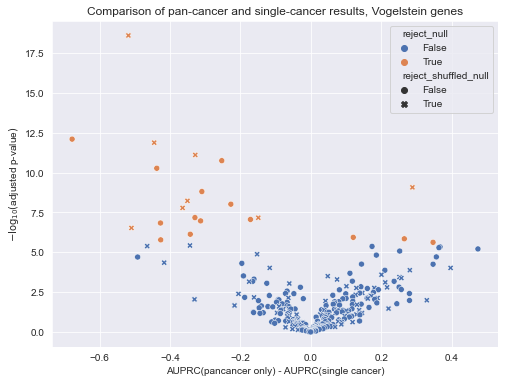

In [8]:
sc_experiment_sig_df['nlog10_p'] = -np.log(sc_experiment_sig_df.p_value)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=sc_experiment_sig_df, x='delta_mean', y='nlog10_p', hue='reject_null',
                style='reject_shuffled_null')
plt.xlabel('AUPRC(pancancer only) - AUPRC(single cancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Comparison of pan-cancer and single-cancer results, Vogelstein genes')

In [9]:
experiment_comparison_df = au.compare_results(pancancer_df,
                                              pancancer_df=remove_cancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=True,
                                              verbose=False)
experiment_comparison_df.sort_values(by='p_value').head()

,identifier,delta_mean,p_value,corr_pval,reject_null
144,BRAF_THCA,-0.500005,5.516906e-08,0.000015,True
180,ATRX_LGG,-0.433115,8.927408e-07,0.000123,True
195,RNF43_UCEC,-0.269848,1.533991e-04,0.010608,True
240,CDH1_BRCA,-0.338518,1.537386e-04,0.010608,True
228,MAP3K1_BRCA,-0.253570,3.453858e-04,0.019065,True


In [10]:
# TODO: reset this to local results directory once experiments finish running
results_dir = '/home/jake/data/pancancer_vogelstein_09_25'
pancancer_comparison_df = pd.read_csv(os.path.join(results_dir, 'pancancer_pvals.tsv'),
                                      index_col=False, sep='\t')
overlap = experiment_comparison_df.index.intersection(pancancer_comparison_df.index)
experiment_sig_df = (
    experiment_comparison_df.reindex(overlap)
                            .assign(reject_shuffled_null=pancancer_comparison_df.reject_null)
)
experiment_sig_df.sort_values(by='corr_pval').head(n=15)

,identifier,delta_mean,p_value,corr_pval,reject_null,reject_shuffled_null
144,BRAF_THCA,-0.500005,5.516906e-08,0.000015,True,True
180,ATRX_LGG,-0.433115,8.927408e-07,0.000123,True,True
240,CDH1_BRCA,-0.338518,1.537386e-04,0.010608,True,True
195,RNF43_UCEC,-0.269848,1.533991e-04,0.010608,True,False
228,MAP3K1_BRCA,-0.253570,3.453858e-04,0.019065,True,False
256,HRAS_HNSC,-0.493408,6.144631e-04,0.028265,True,False
29,CDKN2A_LGG,-0.336243,9.097168e-04,0.031385,True,False
120,NRAS_SKCM,-0.302040,9.037791e-04,0.031385,True,False
95,SPOP_BRCA,-0.389335,1.461427e-03,0.044817,True,True
98,PPP2R1A_UCEC,-0.358520,2.084406e-03,0.057530,False,True


Text(0.5, 1.0, 'Comparison of "pan-cancer only" and pan-cancer results, Vogelstein genes')

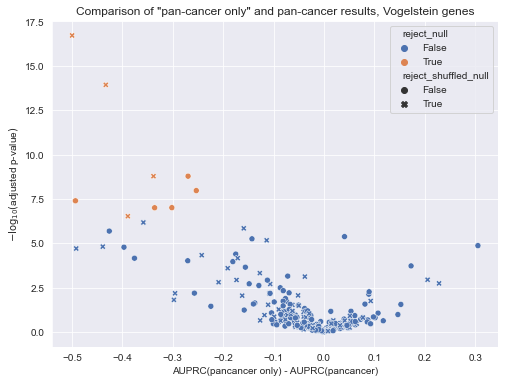

In [11]:
experiment_sig_df['nlog10_p'] = -np.log(experiment_sig_df.p_value)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=experiment_sig_df, x='delta_mean', y='nlog10_p', hue='reject_null',
                style='reject_shuffled_null')
plt.xlabel('AUPRC(pancancer only) - AUPRC(pancancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Comparison of "pan-cancer only" and pan-cancer results, Vogelstein genes')

Text(0.5, 1.0, 'Highlight CASP8_HNSC in comparison plot')

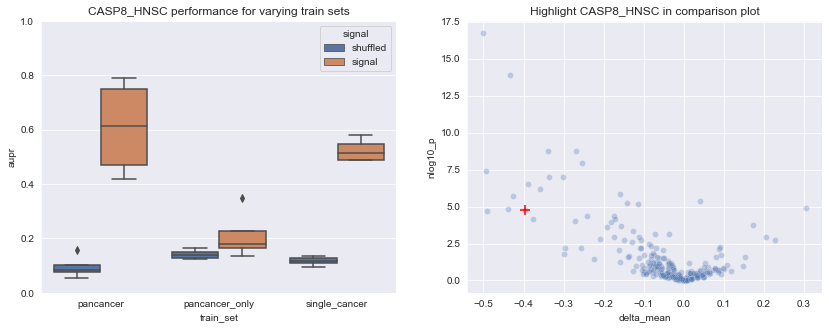

In [43]:
# this is a case where pancancer + THCA comfortably outperforms pancancer without THCA
# plot_identifier = 'TP53_LGG'

# this is a case where pancancer + SKCM slightly outperforms pancancer without SKCM
# but a single-cancer model trained on SKCM alone does best
plot_identifier = 'CASP8_HNSC'

# these are two cases where pancancer without relevant cancer type does better
# (neither is statistically significant, though)
# plot_identifier = 'NF1_GBM'
# plot_identifier = 'GNAS_BRCA'

results_df = pd.concat((
    single_cancer_df, pancancer_df, remove_cancer_df
))
plot_df = results_df[
    (results_df.identifier == plot_identifier) &
    (results_df.data_type == 'test')
].sort_values(by=['signal', 'train_set'])

sns.set({'figure.figsize': (14, 5)})
fig, axarr = plt.subplots(1, 2)
sns.boxplot(data=plot_df, x='train_set', y='aupr', hue='signal', ax=axarr[0])
axarr[0].set_ylim(0, 1)
sns.scatterplot(data=experiment_sig_df, x='delta_mean', y='nlog10_p',
                alpha=0.3, ax=axarr[1])

def highlight_id(x, y, val, ax, id_to_plot):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == id_to_plot:
            ax.scatter(point['x'], point['y'], color='red', marker='+', s=100)
        
highlight_id(experiment_sig_df.delta_mean, experiment_sig_df.nlog10_p,
             experiment_sig_df.identifier, axarr[1], plot_identifier)

axarr[0].set_title('{} performance for varying train sets'.format(plot_identifier))
axarr[1].set_title('Highlight {} in comparison plot'.format(plot_identifier))

In [36]:
experiment_sig_df.sort_values(by='delta_mean', ascending=False).head(n=15)

,identifier,delta_mean,p_value,corr_pval,reject_null,reject_shuffled_null,nlog10_p
57,NCOR1_STAD,0.305563,0.007682,0.128716,False,False,4.868885
154,CARD11_LUAD,0.228358,0.064434,0.486022,False,True,2.742109
260,EGFR_LGG,0.205667,0.052465,0.436087,False,True,2.947607
150,FBXW7_UCEC,0.172817,0.024102,0.255851,False,False,3.725463
139,GNAS_BRCA,0.152578,0.210922,0.943444,False,False,1.556265
12,PIK3CA_READ,0.146688,0.373241,0.997740,False,False,0.985531
113,NF1_SKCM,0.117625,0.530888,0.997740,False,False,0.633205
38,FBXW7_READ,0.107330,0.344570,0.997740,False,False,1.065457
193,RNF43_STAD,0.101442,0.445919,0.997740,False,False,0.807618
275,BAP1_LIHC,0.098162,0.427245,0.997740,False,False,0.850398


Looking at the "volcano plots", we can see that on the whole, models clearly tend to perform worse when the relevant cancer type is removed. This is what we expected to see.

In the above table, looking at the cases where removing the relevant cancer type slightly improves model performance, many of the top results are cancers that are only present in women (e.g. uterine cancer/UCEC, breast cancer/BRCA, ovarian cancer/OV). This isn't always the case, though (ESCA, SKCM, COAD).

In [49]:
def get_cancer_proportions(gene, cancer_type):
    proportions_file = os.path.join(remove_cancer_dir,
                                    gene,
                                    '{}_filtered_cancertypes.tsv'.format(gene))
    proportions_df = pd.read_csv(proportions_file, sep='\t')
    info_dict = {}
    info_dict['num_cancer_types'] = (
        proportions_df.disease_included.sum()
    )
    info_dict['cancer_types'] = (
        proportions_df[proportions_df.disease_included].DISEASE.values
    )
    single_cancer_mutated = (
        proportions_df[proportions_df.DISEASE == cancer_type]
            .status_count.values[0]
    )
    single_cancer_prop = (
        proportions_df[proportions_df.DISEASE == cancer_type]
            .status_proportion.values[0]
    )
    single_cancer_total = single_cancer_mutated / single_cancer_prop
    info_dict['single_cancer_mutated'] = single_cancer_mutated
    info_dict['single_cancer_prop'] = single_cancer_prop
    info_dict['single_cancer_total'] = int(single_cancer_total)
    pancancer_only_mutated = (
        proportions_df[(proportions_df.disease_included) &
                       (proportions_df.DISEASE != cancer_type)]
            .status_count.values
    )
    pancancer_only_prop = (
        proportions_df[(proportions_df.disease_included) &
                       (proportions_df.DISEASE != cancer_type)]
            .status_proportion.values
    )
    info_dict['pancancer_only_mutated'] = pancancer_only_mutated.sum()
    info_dict['pancancer_only_total'] = int((
        pancancer_only_mutated / pancancer_only_prop
    ).sum())
    info_dict['pancancer_only_prop'] = (
        pancancer_only_mutated.sum() / info_dict['pancancer_only_total']
    )
    return info_dict

print(get_cancer_proportions('NF1', 'UCEC'))

{'num_cancer_types': 9, 'cancer_types': array(['BLCA', 'LGG', 'LUAD', 'LUSC', 'OV', 'PCPG', 'SARC', 'SKCM',
       'UCEC'], dtype=object), 'single_cancer_mutated': 25, 'single_cancer_prop': 0.0589622641509434, 'single_cancer_total': 424, 'pancancer_only_mutated': 256, 'pancancer_only_total': 2645, 'pancancer_only_prop': 0.09678638941398866}
